- ### 결정 트리
    - 결정트리의 학습은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습하는 것
        - 정답에 도달?
            - 가능한 모든 테스트에 대해 가장 많은 정보를 가진 것(불순도를 줄이는 것 = 엔트로피를 낮추는 것)
            
     - #### 결정 트리의 복잡도 제어하기
         - 과적합을 막는 두 가지 방법
             - 1. 트리의 생성을 일찍 중단
             - 2. 데이터 포인트가 적은 노드의 삭제 및 병합
        

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn 


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


- 모든 리프 노드를 순수 노드이기 때문에 훈련 세트는 100% 정확도를 갖는다.
- 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있다.
    - 사전 가지치기 (일정 깊이에 도달하면 트리의 성장을 멈추는 것)
        - `max_depth = #` 옵션으로 조절한다.
        - 훈련 세트의 정확성을 떨어뜨리지만 테스트 성능은 개선시킨다.
      
      

In [2]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [3]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'tree.dot', class_names = ['악성', '양성'],
               feature_names= cancer.feature_names, impurity = False, filled = True)

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

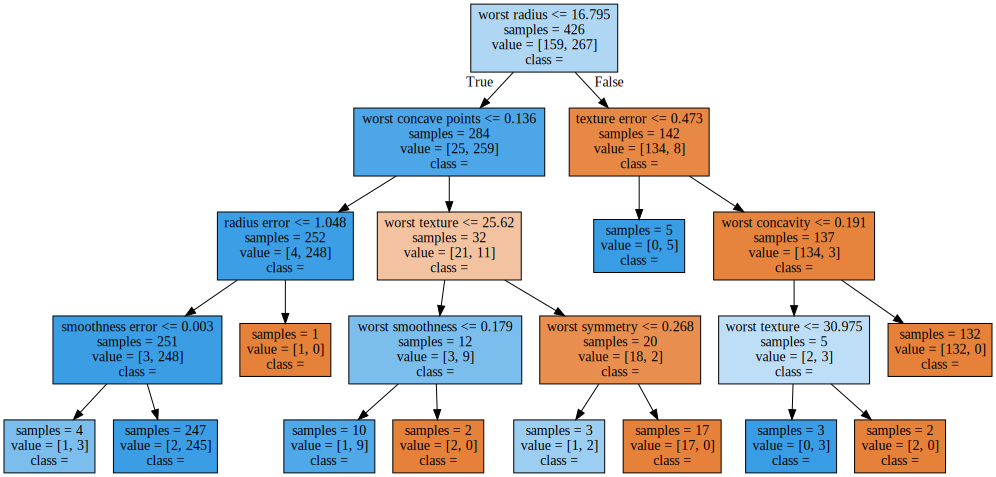

In [18]:
import graphviz

with open('tree.dot', 'rt', encoding = 'UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

plt.show()

- #### 트리 시각화의 장점
    - 알고리즘의 예측이 어떻게 작동하는지 이해하기 쉽다.
    - 설명하기 쉽다.
    
    
- #### 해석 방법

    - `samples` : 각 노드의 샘플 수
    - `value` : 클래스 당 샘플 수
    
- #### 트리의 특성 중요도 
    - 트리의 속성을 요약하는 *특성 중요도*
    - 0과 1사이의 수로 1로 갈수록 완벽하게 타깃 클래스를 예측했다는 뜻

In [19]:
print('특성 중요도 :\n {}'.format(tree.feature_importances_))

특성 중요도 :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


- #### 트리 특성 중요도 시각화
    - 첫 번째 노드에서 사용한 `worst radius`가 가장 중요한 특성으로 나타난다.
        - 첫 노드에서 꽤 잘 나누어졌다는 관찰을 뒷받침함.
        
    - 주의점
        - 특성의 feature_importance가 낮다고 유용하지 않다는 뜻은 아니다.
            - 단지 트리가 그 특성을 선택하지 않았을 뿐
            - 다른 특성이 동일한 정보를 지니고 있어서일 수 있다.
            
    - 선형 모델 계수와 차이점
        - 특성 중요도는 항상 양수
        - 특성이 어떤 클래스를 지지하는지 알 수 없다.
        

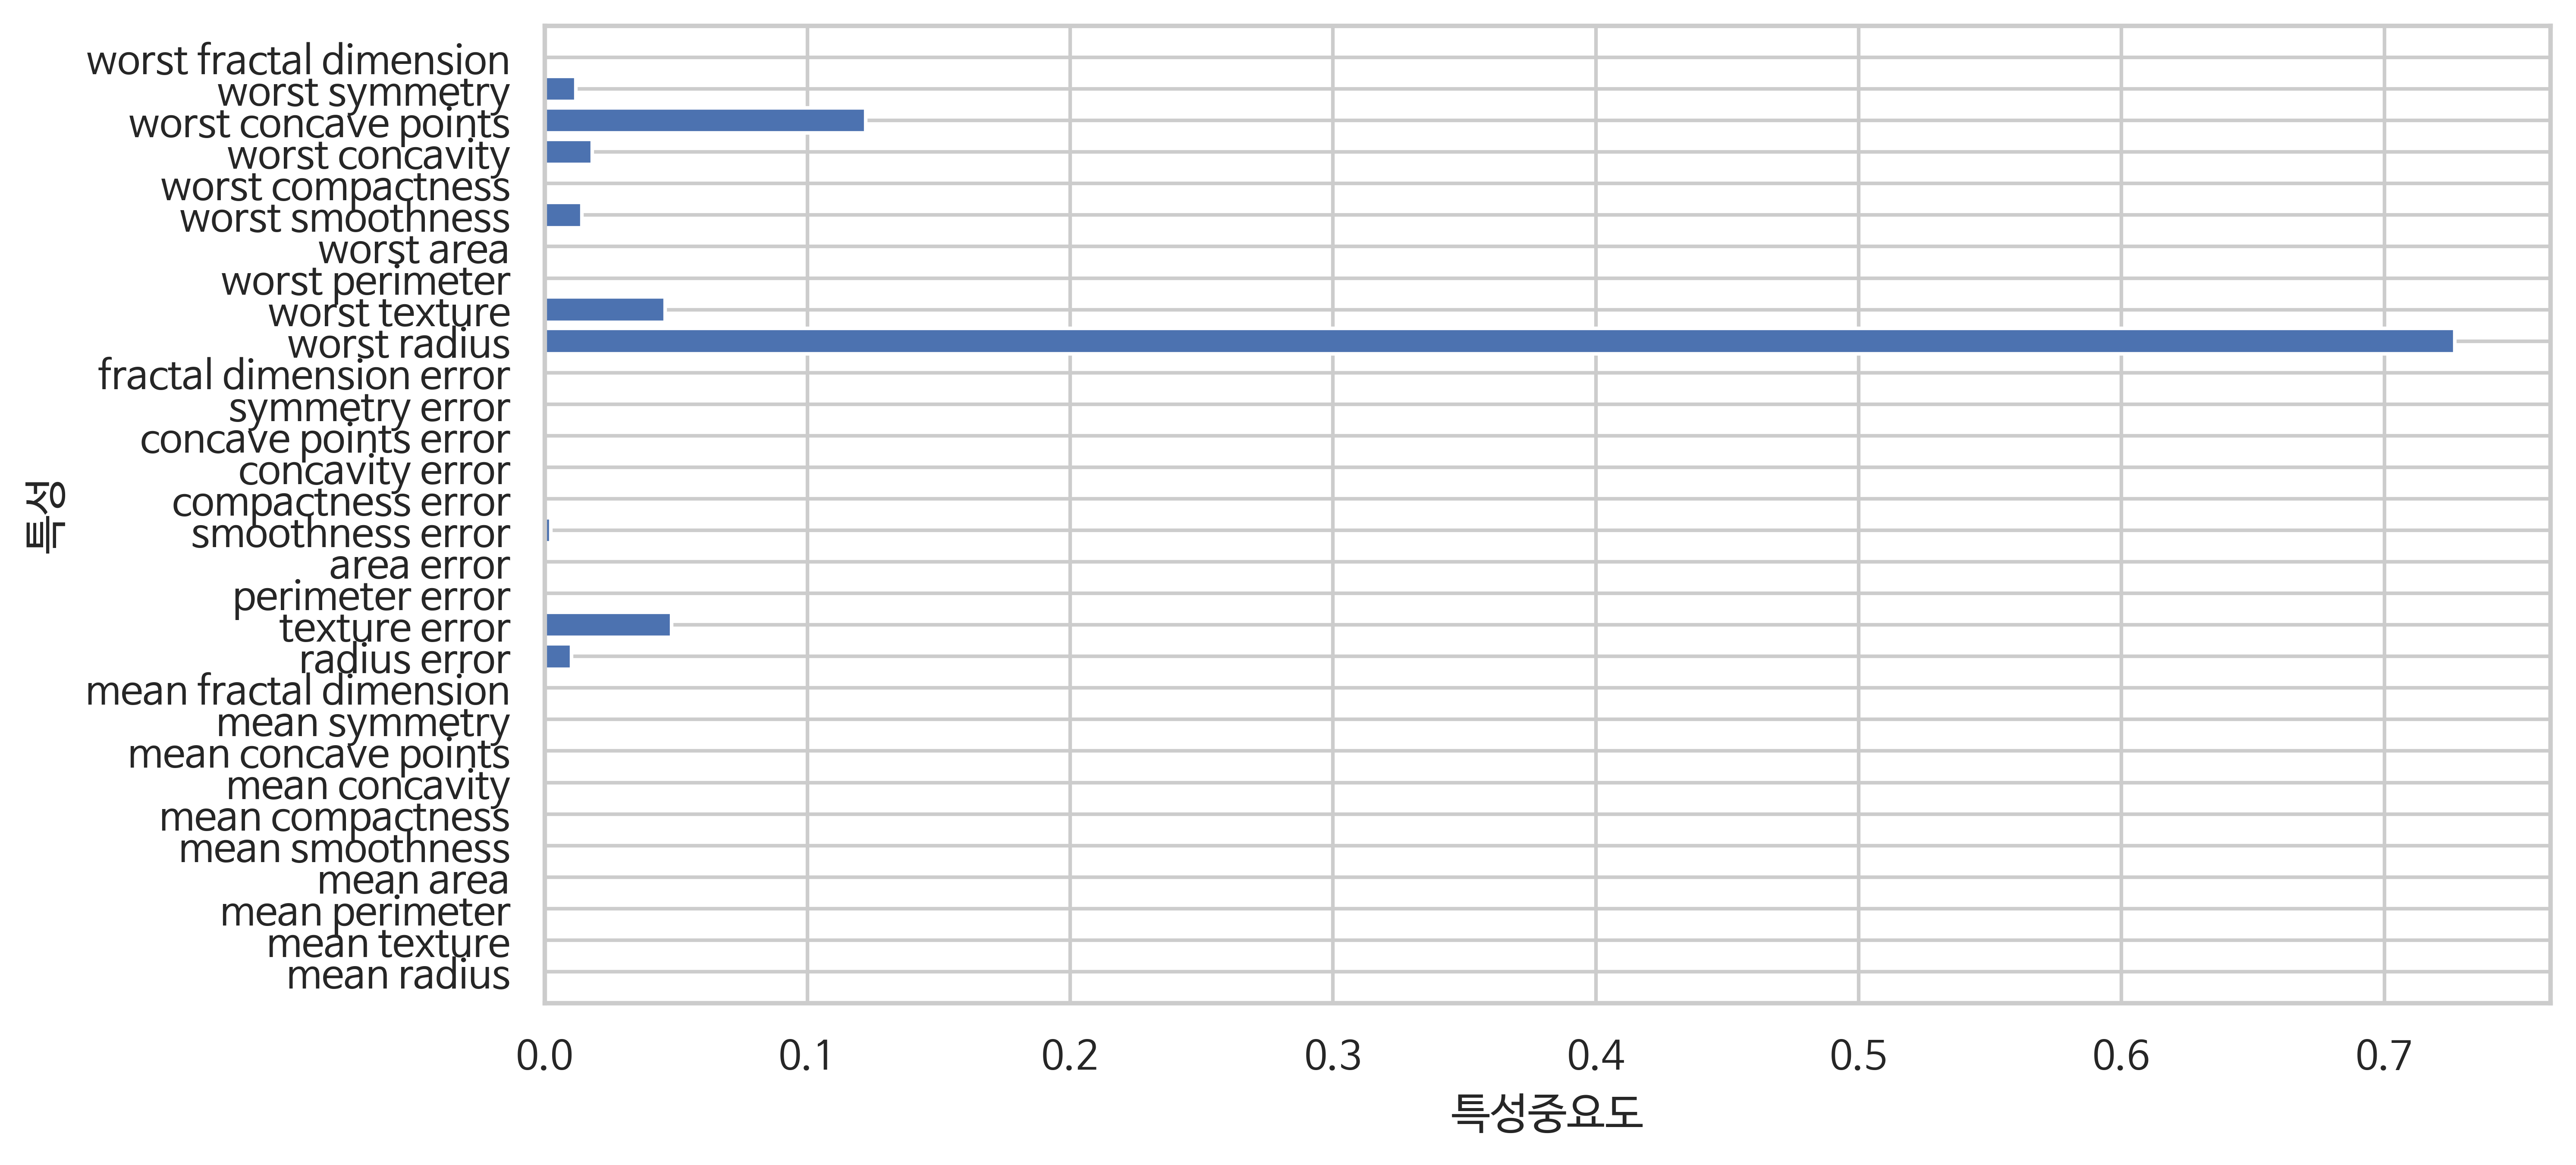

In [23]:
def plot_feature_importances_cancer(model):
    
    plt.figure(figsize = (10,5))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
    
plot_feature_importances_cancer(tree)